In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!pip install keras==2.3.1

In [3]:
#!pip install tensorflow==2.0.0-beta1

In [4]:
import keras

In [5]:
import tensorflow as tf

In [6]:
from keras.models import Sequential, Model

In [7]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [8]:
from keras.optimizers import Adam

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
import matplotlib.pyplot as plt

In [12]:
from keras.callbacks import EarlyStopping

In [13]:
train_path = '/content/drive/MyDrive/drawings/training'
test_path = '/content/drive/MyDrive/drawings/testing'

In [14]:
train= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
training_set = train.flow_from_directory(train_path, target_size=(224, 224), class_mode = 'categorical', classes=['healthy', 'parkinson'], batch_size=24)
val_set = test.flow_from_directory(test_path, target_size=(224, 224), class_mode = 'categorical', classes=['healthy', 'parkinson'], batch_size=24)

Found 144 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [15]:
print(training_set.image_shape)

(224, 224, 3)


(24, 224, 224, 3)


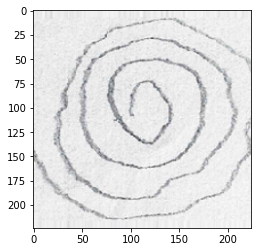

(24, 224, 224, 3)


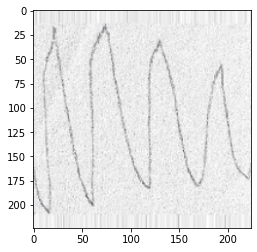

(24, 224, 224, 3)


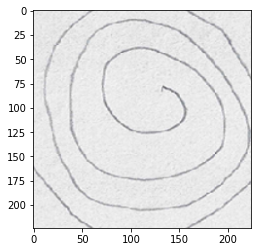

In [16]:
for _ in range(0, 3):
  img, label = training_set.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
model = Sequential()

In [19]:
for layer in vgg16_model.layers[:-4]:
  model.add(layer)

for layer in model.layers:
  layer.trainable = False

In [20]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 block1_conv1 False
1 block1_conv2 False
2 block1_pool False
3 block2_conv1 False
4 block2_conv2 False
5 block2_pool False
6 block3_conv1 False
7 block3_conv2 False
8 block3_conv3 False
9 block3_pool False
10 block4_conv1 False
11 block4_conv2 False
12 block4_conv3 False
13 block4_pool False
14 block5_conv1 False
15 block5_conv2 False
16 block5_conv3 False
17 block5_pool False


In [21]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [23]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=65)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
History = model.fit_generator(training_set, steps_per_epoch=2, validation_data=val_set, validation_steps=1, epochs=25, verbose=2, callbacks=es)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 45s - loss: 2.1735 - accuracy: 0.4375 - val_loss: 5.9900 - val_accuracy: 0.4167
Epoch 2/25
2/2 - 38s - loss: 4.5301 - accuracy: 0.4375 - val_loss: 1.2868 - val_accuracy: 0.7083
Epoch 3/25
2/2 - 37s - loss: 3.0639 - accuracy: 0.5833 - val_loss: 0.7031 - val_accuracy: 0.5833
Epoch 4/25
2/2 - 38s - loss: 3.5188 - accuracy: 0.5833 - val_loss: 0.2242 - val_accuracy: 0.8333
Epoch 5/25
2/2 - 39s - loss: 3.4597 - accuracy: 0.6667 - val_loss: 3.4723 - val_accuracy: 0.5417
Epoch 6/25
2/2 - 40s - loss: 3.1499 - accuracy: 0.6667 - val_loss: 2.7518 - val_accuracy: 0.5000
Epoch 7/25
2/2 - 39s - loss: 3.2084 - accuracy: 0.7083 - val_loss: 1.3997 - val_accuracy: 0.6667
Epoch 8/25
2/2 - 39s - loss: 3.6523 - accuracy: 0.6042 - val_loss: 0.7064 - val_accuracy: 0.8333
Epoch 9/25
2/2 - 40s - loss: 3.2721 - accuracy: 0.6250 - val_loss: 0.7122 - val_accuracy: 0.7917
Epoch 10/25
2/2 - 37s - loss: 2.8875 - accuracy: 0.6042 - val_loss: 0.6564 - val_accuracy: 0.7917
Epoch 11/25
2/2 - 37s - loss:

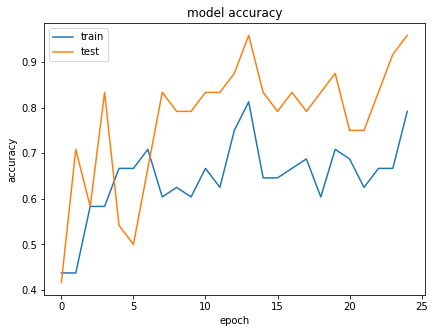

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

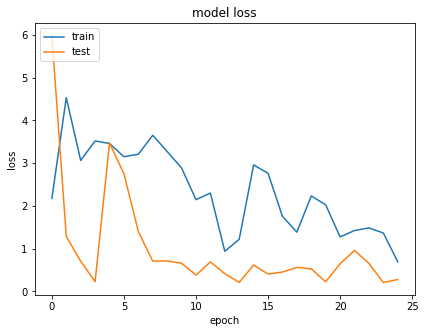

In [27]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [28]:
scores = model.evaluate(val_set)
scores[1]

3/3 [==============================] - 30s 9s/step - loss: 0.3535 - accuracy: 0.8833


0.8833333253860474